In [ ]:
## About temporal and spatial coefficients:
# - time is first converted to seconds, then time slot using slot-size (which was taken to be 300 s)
# - the latitude, longitude values are converted to whole number value by multiplying required powers of 10

# # Normalization - lat, long : (l - l_min); basically converting to a range [0, l_max - l_min]

# # Formula for correlation:
# dST (x, y) = α.dS (x, y) + (1 − α).dT

# ** α can be set to a value a value greater than 0.5 ---> (spatial corr) > (temporal corr)

# # KNN-ST algorithm:
# Inputs: k, α and type. {α - [0,1]; type - [naive (deduced value is simply avg of k nearest neighbors), weighted (weighted avg of k n neighbors; weight is inversely prop to distance from the data point to be deduced), k - number of neighbors to consider]




In [ ]:
# Algorithm
# //k, α and type are input parameters.
for each missing data-point x do
  # //Find deduced value of x, xd
  Get the values of the k nearest points into array S[1..k]
  # values means?? distance or direct cordinate values?

  and the associated d_ST distances into array D[1..k]; 
  # d_ST (x, y) = α.d_S (x, y) + (1 − α).d_T

  x_d ← 0
  if type = ′naive′ then
    sum_s ← 0
    
    for i = 1 to k do
      sum_s ← sum_s + S[i]
    end for
    xd ← sums/k # simple avg of kNN values

  else #type is weighted avg
    if type = ′weighted′ then
      sum_s ← 0; sum_d ← 0
      
      for i = 1 to k do
        sum_d ← sum_d + 1/D[i]
      end for
      
      for i = 1 to k do
        x_d ← x_d + ((1/D[i])/sum_D).S[i] # Does D and d have different significance?
      end for

    end if
  end if
end for

#### Performance Evaluation

In [ ]:
      summation{i,j,t:S(i,j,t)=0 (|S(i, j, t) − Sˆ(i, j, t)|)} 
NE = ----------------------------------------------------------
        summation{i,j,t:S(i,j,t)=0 (|S(i, j,t)|) }


where, 
S(i, j, t) is the actual sensed value at voxel (i, j, t)
Sˆ(i, j, t) is the deduced value at voxel (i, j, t). 

When, S(i, j, t) = 0, it means value at voxel (i, j, t) is missing (and has to be deduced)

#### Loss probability

In [ ]:
loss probability of 0.8 represents 80% of data is missing.

In [ ]:
ratioS = error(KNN-S)/(error(KNN-S)+error(KNN-T)). 

Here,
error(KNN-S) and error(KNN-T) represent the error arrived
at when KNN-S and KNN-T are applied respectively. 

Similarly, 
ratioT = error(KNN-T)/(error(KNN-S) + error(KNN-T)).


#### The higher the error ratio, the lesser the correlation

In [ ]:
## set α = 1−ratioS since α is the weight assigned to the spatial component. 

### More on Federated Learning


Mounted at /content/drive


In [ ]:
# What I understood is, basically the server has connection with multiple clients (say mobile devices).
# The problem was earlier, client had to send their data (say heath data, messages typed on keyboard) to server so that a model can be built using clients data
# Here, privacy and protection of data was at stake

# Now using FL, the server will initiate a model (based on know parameters to consider) using some weights and biases.
# The same parameters will be sent to all the clients.
# On client devices, a model will be built using the received parameters and then train and update it accordingly. This process will occur on each client
# Once trained, the learned weight and biases will be sent server.
# On server, all the weights and biases will be aggregated (say using mean/average) and then that aggreated updated weights and biases will again be sent to each clients
# The above process will be repeated until we reach a optimal weights and biases [Although in real life, as new data gets generated everyday on client devices, the process should take place regularly to serve clients with the best model]
# Throughtout the process, clients' data never leave their place.



In [ ]:
## How different from Distributed Learnings?
# Definitely different from distributed learnings. In distributed learning, all the high-end devices are generally on same network inside a restricted area.
# Distributed learing is thus much much faster than FL. (one because FL devices are on different networks; second devices have very less processing power)

In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

  # Server executes:
    initialize w_0
    for each round t = 1, 2, . . . do
      m ← max(C · K, 1)
      S_t ← (random set of m clients)
    
      for each client k ∈ S_t in parallel do
        w^(k)_(t+1) ← ClientUpdate(k, w_t)
      w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;


  # ClientUpdate(k, w): // Run on client k
    B ← (split P_k into batches of size B) # what is p_K???
    for each local epoch i from 1 to E do
      for batch b ∈ B do
        w ← w − η O l(w; b) # this seems the SGD process
    
    return w to server


In [ ]:
# Improvements on FedAvg
  # Problem with FedAvg: 1. assumption that all local devices will have 'E' epochs of SGD; as a result some devices takes longer time than others
                      # 2. FedAvg ends up prefering devices with more data
              
  # 1st improvement: FedProx:
                          # 1. adds a regularization term to penalize large change in weights

  # and many more improvements are there


In [ ]:
# # Frameworks and datasets
#   1. TensorFlow Federated: Machine Learning on Decentralized Data
#   2. PyTorch: PySyft
#   3. Flower: pip install flwr

# 20th Sept, 2021


[Gradient Descent in LR](https://miro.medium.com/max/450/1*G3evFxIAlDchOx5Wl7bV5g.png)

### Batched Gradient Descent
*  In the batch gradient descent, to calculate the gradient of the cost function, we need to sum all training examples for each steps
* If we have 3 millions samples (m training examples) then the gradient descent algorithm should sum 3 millions samples for every epoch. To move a single step, we have to calculate each with 3 million times!

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
       Performs gradient descent to learn theta
       theta: t0 (y-intercept), t1 (slope)
    """
    m = y.size  # number of training examples

    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
    return theta

### Stochastic Gradient Descent (SGD)
* In stochastic Gradient Descent, we use one example or one training sample at each iteration instead of using whole dataset to sum all for every steps
* SGD is widely used for larger dataset trainings and computationally faster and can be trained in parallel

In [ ]:
def SGD(f, theta0, alpha, num_iters):
    """ 
       Arguments:
       f -- the function to optimize, it takes a single argument
            and yield two outputs, a cost and the gradient
            with respect to the arguments
       theta0 -- the initial point to start SGD from
       num_iters -- total iterations to run SGD for
       Return:
       theta -- the parameter value after SGD finishes
    """
    start_iter = 0
    theta= theta0
    for iter in xrange(start_iter + 1, num_iters + 1):
        _, grad = f(theta)
        theta = theta - (alpha * grad) # there is NO dot product!
    return theta

### Mini-Batch Gradient Descent
* It is similar like SGD, it uses n samples instead of 1 at each iteration.

# 22nd September, 2021
#### Implementing the Algorithm using python code

In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv")



# Server executes: 
def Server():
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=2))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer=init_mode, activation=tf.nn.softmax)) # output layer

  # compile model
  model.compile(loss='mse',
            optimizer='SGD',
            metrics=['mse'])
  
  # return model

  # for each round t = 1, 2, . . . do
  for t in range(1, 5):
    C = np.random.random(1)[0]

    # m ← max(C  K, 1)
    m = max(int(C*K), 1) # m == random number of client selected
    weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
    n_k = [None] * m # parameters for weighted sum 


    # S_t ← (random set of m clients)
    S = {} # dictionary
    m_clients = np.random.uniform(low=101, high=126, size=(m)).astype(int)
    for client in m_clients:
      S[client] = clients[client]
    
    initial_weights = model.get_weights() # setting initial weights; should be same for all clients

    # for each client k ∈ S_t in parallel do
    client_idx = 0
    for client in S:
      # w^(k)_(t+1) ← ClientUpdate(k, model)
      n_k[client_idx] = Client(client, model) # pass by reference
      weight_t_plus_1[client_idx] = model.get_weights()
      client_idx += 1
      
      # setting weights back to initial weights
      model.set_weights(initial_weights)

    final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0]/ sum(n_k))

    for idx in range(1, len(weight_t_plus_1)):
      # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
      final_weights_t += np.array(weight_t_plus_1[0]) * (n_k[idx]/ sum(n_k))

    # setting the aggregated weights
    model.set_weights(final_weights_t)

# -----------------------------------------------------------------------------------------------------------------------


# ClientUpdate(k, w): // Run on client k
def Client(client, model):
  B ← (split P_k into batches of size B) # what is p_K???
  for each local epoch i from 1 to E do
    for batch b ∈ B do
      w ← w − η O l(w; b) # this seems the SGD process

   return w to server

# 24th Sept, 2021

In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv")



# Server executes: 
def Server():
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=2))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer=init_mode, activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  # for each round t = 1, 2, . . . do
  for t in range(1, 5):
    C = np.random.random(1)[0] # random number between 0 and 1.

    # m ← max(C  K, 1)
    m = max(int(C*K), 1) # m == random number of client selected
    weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
    n_k = [None] * m # parameters for weighted sum 


    # S_t ← (random set of m clients)
    # S = {} # dictionary
    S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

    # No need for below loop, as server don't need access to client data, server only need clients' number
    # for client in m_clients:
    #   S[client] = clients[client]
    
    initial_weights = model.get_weights() # setting initial weights; should be same for all clients
    # for t= 1 to T, initial_weights would be t-1th's final weights

    # for each client k ∈ S_t in parallel do
    client_idx = 0
    for client in S_t:
      # w^(k)_(t+1) ← ClientUpdate(k, model)
      n_k[client_idx] = Client(client, model) # pass by reference
      weight_t_plus_1[client_idx] = model.get_weights()
      client_idx += 1
      
      # setting weights back to initial weights
      model.set_weights(initial_weights)

    # finding the weighted sum
    final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

    for idx in range(1, m):
      # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
      final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

    # setting the aggregated weights
    model.set_weights(final_weights_t)

# -----------------------------------------------------------------------------------------------------------------------


# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
# B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
  B = len(clients[client_idx]) / 1000 # so for each client the batch size would be different depending upon the total sample size
  E = 30 + B # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])
  

# for each local epoch i from 1 to E do
#   for batch b ∈ B do
#     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops
  dataset = clients[client_idx]
  X, y = 
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)
  keras_model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  validation_data=(x_test, y_test),
                  verbose=True)

  # return w to server
  # in our case no need for any explicit return; as the model is pass by value
  return dataset.shape[0] # this will return the number of total sample


# 29th Sept, 2021

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
print(tf.__version__)
print(tf.keras.__version__)

2.2.0
2.3.0-tf


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.2.0
2.3.0-tf


In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)


In [ ]:
4//2


2

In [ ]:
# import pandas as pd
# df = pd.DataFrame({'datetime':pd.date_range('2020-01-01 07:00',periods=6)})
# print("DataFrame is:\n", df)
# for d in df['datetime']:
#    df['date'] = d.date()
#    df['time'] = d.time()
# print(df)

DataFrame is:
              datetime
0 2020-01-01 07:00:00
1 2020-01-02 07:00:00
2 2020-01-03 07:00:00
3 2020-01-04 07:00:00
4 2020-01-05 07:00:00
5 2020-01-06 07:00:00
             datetime        date      time
0 2020-01-01 07:00:00  2020-01-06  07:00:00
1 2020-01-02 07:00:00  2020-01-06  07:00:00
2 2020-01-03 07:00:00  2020-01-06  07:00:00
3 2020-01-04 07:00:00  2020-01-06  07:00:00
4 2020-01-05 07:00:00  2020-01-06  07:00:00
5 2020-01-06 07:00:00  2020-01-06  07:00:00


In [ ]:
# Updating time column
for station_id in range(101,126):
  clients[station_id]['Measurement date'] = pd.to_datetime(clients[station_id]['Measurement date']) #changing the data type of column
  for dt in clients[station_id]['Measurement date']:
    clients[station_id]['date'], clients[station_id]['time'] = dt.date(), dt.time()

In [ ]:
clients[101].head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time,day,month,year
0,2017-01-01 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,2019-12-31,23:00:00,1,1,2017
1,2017-01-01 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,2019-12-31,23:00:00,1,1,2017
2,2017-01-01 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,2019-12-31,23:00:00,1,1,2017
3,2017-01-01 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,2019-12-31,23:00:00,1,1,2017
4,2017-01-01 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,2019-12-31,23:00:00,1,1,2017


In [ ]:
clients[101].columns

Index(['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude',
       'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5', 'date', 'time', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
clients[101].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25905 entries, 0 to 25904
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Measurement date  25905 non-null  datetime64[ns]
 1   Station code      25905 non-null  int64         
 2   Address           25905 non-null  object        
 3   Latitude          25905 non-null  float64       
 4   Longitude         25905 non-null  float64       
 5   SO2               25905 non-null  float64       
 6   NO2               25905 non-null  float64       
 7   O3                25905 non-null  float64       
 8   CO                25905 non-null  float64       
 9   PM10              25905 non-null  float64       
 10  PM2.5             25905 non-null  float64       
 11  date              25905 non-null  object        
 12  time              25905 non-null  object        
 13  day               25905 non-null  int64         
 14  month             2590

In [ ]:
# taking required featuring and dropping rest
for station_id in range(101,126):
  clients[station_id] = clients[station_id][['Latitude', 'Longitude','day', 'month', 'year','CO']].copy()

In [ ]:
t = pd.to_datetime("2017-04-21 05:00")
type(t.month)
# t.day
# type(t.year)
# t.time()

int

In [ ]:
clients[101]

,Latitude,Longitude,time,date,CO
0,37.572016,127.005007,23:00:00,2019-12-31,1.2
1,37.572016,127.005007,23:00:00,2019-12-31,1.2
2,37.572016,127.005007,23:00:00,2019-12-31,1.2
3,37.572016,127.005007,23:00:00,2019-12-31,1.2
4,37.572016,127.005007,23:00:00,2019-12-31,1.2
...,...,...,...,...,...
25900,37.572016,127.005007,23:00:00,2019-12-31,0.5
25901,37.572016,127.005007,23:00:00,2019-12-31,0.4
25902,37.572016,127.005007,23:00:00,2019-12-31,0.4
25903,37.572016,127.005007,23:00:00,2019-12-31,0.5


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
# B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
  B = len(clients[client_idx]) / 1000 # so for each client the batch size would be different depending upon the total sample size
  E = 30 + B # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])
  

# for each local epoch i from 1 to E do
#   for batch b ∈ B do
#     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops
  dataset = clients[client_idx]
  X, y = dataset[['Latitude', 'Longitude','day', 'month', 'year']].copy(),  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
                  validation_data=(x_test, y_test),
                  verbose=True)

  # return w to server
  # in our case no need for any explicit return; as the model is pass by value
  return dataset.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=2))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  # for each round t = 1, 2, . . . do
  for t in range(1, 5):
    C = np.random.random(1)[0] # random number between 0 and 1.

    # m ← max(C  K, 1)
    m = max(int(C*K), 1) # m == random number of client selected
    weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
    n_k = [None] * m # parameters for weighted sum 


    # S_t ← (random set of m clients)
    # S = {} # dictionary
    S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

    # No need for below loop, as server don't need access to client data, server only need clients' number
    # for client in m_clients:
    #   S[client] = clients[client]
    
    initial_weights = model.get_weights() # setting initial weights; should be same for all clients
    # for t= 1 to T, initial_weights would be t-1th's final weights

    # for each client k ∈ S_t in parallel do
    client_idx = 0
    for client in S_t:
      # w^(k)_(t+1) ← ClientUpdate(k, model)
      n_k[client_idx] = Client(client, model) # pass by reference
      weight_t_plus_1[client_idx] = model.get_weights()
      client_idx += 1
      
      # setting weights back to initial weights
      model.set_weights(initial_weights)

    # finding the weighted sum
    final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

    for idx in range(1, m):
      # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
      final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

    # setting the aggregated weights
    model.set_weights(final_weights_t)

  print(model.get_weights())

In [ ]:
Server()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


TypeError: ignored

# 30th sept, 2021

In [ ]:
# Details of FedAvg
  # FedAvg Loss: aim is to minimize overall global loss 
  # f(w) = summation(k=1 to K){(n_k / n) * F_k(w)}
  # K - number of clients
  # F_k - Client k's loss function; this is getting calculated on each client's individual devices
  # n_k - weighted by size of client k's dataset; devices with larger dataset will have more losses
  # Algorithm: FederatedAveraging. The K clients are
            # indexed by k; B is the local mini-batch size, E is the number
            # of local epochs, and η is the learning rate.

K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)


In [ ]:
# taking required featuring and dropping rest
for station_id in range(101,126):
  clients[station_id] = clients[station_id][['Latitude', 'Longitude','day', 'month', 'year','CO']].copy()

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model):
# B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
  B = 1 #int(len(clients[client_idx]) * 0.1) # so for each client the batch size would be different depending upon the total sample size
  E = 1 #max(30, B/1 # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])
  

# for each local epoch i from 1 to E do
#   for batch b ∈ B do
#     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops
  dataset = clients[client_idx]
  
  X, y = dataset[['Latitude', 'Longitude','day', 'month', 'year']].copy(),  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)

  try:
    model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
                    validation_data=(x_test, y_test),
                    verbose=True)
  except Exception as e:
    print(e)
    print("tata bye bye")

  # return w to server
  # in our case no need for any explicit return; as the model is pass by value
  return dataset.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server():
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=5))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  # for each round t = 1, 2, . . . do
  for t in range(1, 5):
    C = np.random.random(1)[0] # random number between 0 and 1.

    # m ← max(C  K, 1)
    m = max(int(C*K), 1) # m == random number of client selected
    weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
    n_k = [None] * m # parameters for weighted sum 


    # S_t ← (random set of m clients)
    # S = {} # dictionary
    S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

    # No need for below loop, as server don't need access to client data, server only need clients' number
    # for client in m_clients:
    #   S[client] = clients[client]
    
    initial_weights = model.get_weights() # setting initial weights; should be same for all clients
    # for t= 1 to T, initial_weights would be t-1th's final weights

    # for each client k ∈ S_t in parallel do
    client_idx = 0
    for client in S_t:
      # w^(k)_(t+1) ← ClientUpdate(k, model)
      n_k[client_idx] = Client(client, model) # pass by reference
      weight_t_plus_1[client_idx] = model.get_weights()
      client_idx += 1
      
      # setting weights back to initial weights
      model.set_weights(initial_weights)

    # finding the weighted sum
    final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

    for idx in range(1, m):
      # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
      final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

    # setting the aggregated weights
    model.set_weights(final_weights_t)

  print(model.get_weights())

In [ ]:
Server()



---



---



In [ ]:
loss_probability = (missing values)/(total rows)
# 0.1 --> 10/100
NE = summation(abs(y_true - y_predicted)) / summation(y_true)

# 1st october : Both FL and Traditional ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
%%time
# getting input data
K = 25 # as we have 25 clients
clients = {} # dictionary

# reading all the clients
for st_code in range(101,126):
    clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

    clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

    clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
    clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
    clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
    clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
    clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
    clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
    clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

    # choosing features
    clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]



# dataset['date'], dataset['time'] = dataset['Measurement date'].dt.date, dataset['Measurement date'].dt.time



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


CPU times: user 2.59 s, sys: 233 ms, total: 2.82 s
Wall time: 20.8 s


In [ ]:
# merging all the clients data
import pandas as pd

frames = list(clients.values())

dataset = pd.concat(frames)
display(dataset)


,Latitude,Longitude,year,month,week,day,hour,dayOfWeek,CO
0,37.572016,127.005007,2017,1,52,1,0,6,1.2
1,37.572016,127.005007,2017,1,52,1,1,6,1.2
2,37.572016,127.005007,2017,1,52,1,2,6,1.2
3,37.572016,127.005007,2017,1,52,1,3,6,1.2
4,37.572016,127.005007,2017,1,52,1,4,6,1.2
...,...,...,...,...,...,...,...,...,...
647506,37.544962,127.136792,2019,12,1,31,19,1,0.5
647507,37.544962,127.136792,2019,12,1,31,20,1,0.4
647508,37.544962,127.136792,2019,12,1,31,21,1,0.4
647509,37.544962,127.136792,2019,12,1,31,22,1,0.5


In [ ]:
X, y = dataset.drop('CO', axis=1),  dataset['CO']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
x_test[0].shape

(8,)

In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, loss_p):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])


    # for each local epoch i from 1 to E do
    #   for batch b ∈ B do
    #     w ← w − η O l(w; b) # this seems the SGD process

    # fitting the model: same as above two for loops
    data = clients[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
    #                     validation_data=(x_test, y_test),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(loss_p):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 5):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, loss_p) # pass by reference
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, loss_p):
    
    X, y = dataset.drop('CO', axis=1),  dataset['CO']
    
#     for loss_p in loss_prob:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=0)
   
    # adjusting the dimensions
    x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
        
    NE = sum(abs(y_test - y_predicted)) / sum(y_test)
    return NE  
          

In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

for loss_p in loss_prob:
  model = Server(loss_p)
  errors.append(error_clients(model, loss_p))

# import seaborn as sns
# sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
errors[0]

array([[1.02276379]])

In [ ]:
errors[0].ravel()[0]

1.0227637921798483

In [ ]:
# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

In [ ]:
errors

[1.0227637921798483,
 1.0231448768600002,
 1.0219129321046316,
 1.0227209476040346,
 1.0226674799061215,
 1.0220998885081014,
 1.02239743534543,
 1.0222275615431877,
 1.0221784548709607]

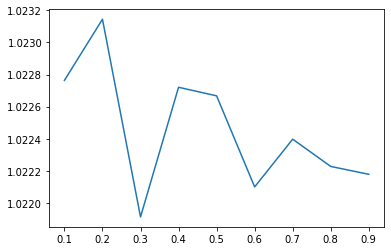

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])


  # for each local epoch i from 1 to E do
  #   for batch b ∈ B do
  #     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops

  # data = dataset.loc[dataset['Station code'] == client_idx]

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
  #                     validation_data=(x_test, y_test),
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      
  NE = sum(abs(y_test - y_predicted)) / sum(y_test)
  return NE


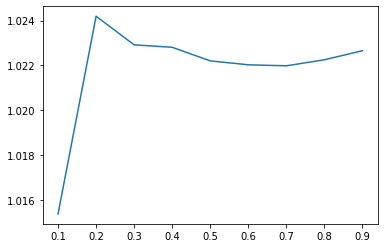

In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

#### for each loss prob, as it explodes memory

In [ ]:
# X, y = dataset.drop('CO', axis=1),  dataset['CO']

# #     for loss_p in loss_prob:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
# x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
# x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
# # x_test[0].shape
# y_predicted = models[0].predict(x_test)
    


In [ ]:
# y_predicted.shape

In [ ]:
# y_test = y_test.reshape(y_test.shape[0], 1,1)

In [ ]:
# error = sum(abs(y_test - y_predicted)) / sum(y_test)
# # error

In [ ]:
# sum(y_test)

In [ ]:
# x_test.reshape(x_test.shape[0], x_test.shape[1], 1).shape

In [ ]:
# errors.append(error_clients(models[0], loss_prob[0]))

# 3rd October
* Changed the NE's denominator to absolute values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
# import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD # from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop # instead of from keras.optimizers import RMSprop
# from keras import datasets

# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [ ]:
# ClientUpdate(k, w): // Run on client k
def Client(client_idx, model, loss_p):
    # B ← (split P_k into batches of size B) # what is p_K --> each clients' sample size
    B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
    E = 12 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
    learning_rate = 0.1 # initial learning rate
    decay_rate = 0.1
    momentum = 0.8

    # define the optimizer function
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

    # compile the model
    model.compile(loss='mse', 
                optimizer=sgd, 
                metrics=['mse'])


    # for each local epoch i from 1 to E do
    #   for batch b ∈ B do
    #     w ← w − η O l(w; b) # this seems the SGD process

    # fitting the model: same as above two for loops
    data = clients[client_idx]
    # data = dataset.loc[dataset['Station code'] == client_idx]

    X, y = data[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  data['CO']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

    try:
        model.fit(x_train, y_train, 
                    epochs = E, 
                    batch_size=B,
    #                     validation_data=(x_test, y_test),
                    verbose=False)
    except Exception as e:
        print(e)
        print("tata bye bye")

    # return w to server
    # in our case no need for any explicit return; as the model is pass by value
    return data.shape[0] # this will return the number of total sample


In [ ]:
# Server executes: 
def Server(loss_p):
    # initialize w_0
    model = Sequential()
    
    # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

    # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


# for each round t = 1, 2, . . . do
    for t in range(1, 20):
        C = np.random.random(1)[0] # random number between 0 and 1.

        # m ← max(C  K, 1)
        m = max(int(C*K), 1) # m == random number of client selected
        weight_t_plus_1 = [None] * m # matrix to store the weights of all client in each t-round
        n_k = [None] * m # parameters for weighted sum 


        # S_t ← (random set of m clients)
        # S = {} # dictionary
        S_t = np.random.uniform(low=101, high=126, size=(m)).astype(int)

        # No need for below loop, as server don't need access to client data, server only need clients' number
        # for client in m_clients:
        #   S[client] = clients[client]

        initial_weights = model.get_weights() # setting initial weights; should be same for all clients
        # for t= 1 to T, initial_weights would be t-1th's final weights

        # for each client k ∈ S_t in parallel do
        client_idx = 0
        for client in S_t:
            # w^(k)_(t+1) ← ClientUpdate(k, model)
            n_k[client_idx] = Client(client, model, loss_p) # pass by reference
            weight_t_plus_1[client_idx] = model.get_weights()
            client_idx += 1

            # setting weights back to initial weights
            model.set_weights(initial_weights)

        # finding the weighted sum
        final_weights_t = np.array(weight_t_plus_1[0]) * (n_k[0] / sum(n_k))

        for idx in range(1, m):
          # w_(t+1) ← summation(k=1 to K){(n_k/n) * w^(k)_(t+1)} #n_k - no. of training sample in each client K; n - total training samples;
          final_weights_t += np.array(weight_t_plus_1[idx]) * (n_k[idx]/ sum(n_k))

        # setting the aggregated weights
        model.set_weights(final_weights_t)


#         print(model.get_weights())
    # return error_clients(model, loss_p)) # THIS LINE WON'T BE THERE IN REAL SERVER
    return model

In [ ]:
def error_clients(model, loss_p):
    
    X, y = dataset.drop('CO', axis=1),  dataset['CO']
    
#     for loss_p in loss_prob:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=0)
   
    # adjusting the dimensions
    x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
    x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
    y_test = y_test.reshape(y_test.shape[0],1,1)

    y_predicted = model.predict(x_test)
        
    NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
    return NE  
          

In [ ]:
%%time
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
models = []
errors = []

clients = {} # dictionary

# reading all the clients and building model
for lp in loss_prob:
    for st_code in range(101,126):
        clients[st_code] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataNew/station_code"+str(st_code)+".csv", index_col = 0)

        clients[st_code]['Measurement date'] = pd.to_datetime(clients[st_code]['Measurement date'])

        clients[st_code]['year'] = clients[st_code]['Measurement date'].dt.year
        clients[st_code]['month'] = clients[st_code]['Measurement date'].dt.month
        clients[st_code]['week'] = clients[st_code]['Measurement date'].dt.week
        clients[st_code]['day'] = clients[st_code]['Measurement date'].dt.day
        clients[st_code]['hour'] = clients[st_code]['Measurement date'].dt.hour
        clients[st_code]['minute'] = clients[st_code]['Measurement date'].dt.minute # minute is not significant; as only 0 values
        clients[st_code]['dayOfWeek'] = clients[st_code]['Measurement date'].dt.dayofweek

        # choosing features
        clients[st_code] = clients[st_code][['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek', 'CO']]


        # splitting into train test split
        X, y = dataset.drop('CO', axis=1),  dataset['CO']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = lp, random_state=0)
        x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
        

# dataset['date'], dataset['time'] = dataset['Measurement date'].dt.date, dataset['Measurement date'].dt.time
# merging all the clients data
import pandas as pd

frames = list(clients.values())

dataset = pd.concat(frames)
display(dataset)





for loss_p in loss_prob:
  model = Server(loss_p)
  errors.append(error_clients(model, loss_p))

# import seaborn as sns
# sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
errors[0]

In [ ]:
errors[0].ravel()[0]

In [ ]:
# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

In [ ]:
errors

In [ ]:
import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

In [ ]:
def traditional_ML(loss_p):
  # initialize w_0
  model = Sequential()

  # model.add(Dense(64, kernel_initializer='zeros', bias_initializer='zeros', activation=tf.nn.relu, input_dim=6)) # first dense/hidden layer
  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu, input_dim=8))
  model.add(Dropout(0.1))

  model.add(Dense(64, kernel_initializer='he_uniform', bias_initializer="zeros", activation=tf.nn.relu)) # second dense/hidden layer
  model.add(Dropout(0.2))

  model.add(Dense(1, kernel_initializer= 'he_uniform', activation=tf.nn.softmax)) # output layer

  # initial_weights = model.get_weights() # setting initial weights; should be same for all clients


  B = 1000 #int(len(clients[client_idx]) * 0.01) # so for each client the batch size would be different depending upon the total sample size
  E = 25 #max(30, B//10) # number of local epochs; it will also depend on sample size (indirectly)
  learning_rate = 0.1 # initial learning rate
  decay_rate = 0.1
  momentum = 0.8

  # define the optimizer function
  sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

  # compile the model
  model.compile(loss='mse', 
              optimizer=sgd, 
              metrics=['mse'])


  # for each local epoch i from 1 to E do
  #   for batch b ∈ B do
  #     w ← w − η O l(w; b) # this seems the SGD process

  # fitting the model: same as above two for loops

  # data = dataset.loc[dataset['Station code'] == client_idx]

  X, y = dataset[['Latitude', 'Longitude','year', 'month', 'week', 'day', 'hour', 'dayOfWeek']],  dataset['CO']

  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = loss_p, random_state=1)

  model.fit(x_train, y_train, 
                  epochs = E, 
                  batch_size=B,
  #                     validation_data=(x_test, y_test),
                  verbose=False)
      
  x_test, y_test = x_test.to_numpy(), y_test.to_numpy()

  # adjusting the dimensions
  x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
  y_test = y_test.reshape(y_test.shape[0],1,1)
  y_predicted = model.predict(x_test)
      
  NE = np.sum(abs(np.array(y_test) - np.array(y_predicted))) / np.sum(abs(np.array(y_test)))
  return NE


In [ ]:
# Final plotting
K = 25 # as we have 25 clients

loss_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
errors = []

for loss_p in loss_prob:
  error = traditional_ML(loss_p)
  errors.append(error)

# reshaping errors
for err_idx in range(len(errors)):
  errors[err_idx] = errors[err_idx].ravel()[0]

import seaborn as sns
sns.lineplot(x = loss_prob, y = errors, markers=True, dashes=False)

#### for each loss prob, as it explodes memory

In [ ]:
# X, y = dataset.drop('CO', axis=1),  dataset['CO']

# #     for loss_p in loss_prob:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
# x_test, y_test = x_test.to_numpy(), y_test.to_numpy()
# x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
# # x_test[0].shape
# y_predicted = models[0].predict(x_test)
    


In [ ]:
# y_predicted.shape

In [ ]:
# y_test = y_test.reshape(y_test.shape[0], 1,1)

In [ ]:
# error = sum(abs(y_test - y_predicted)) / sum(y_test)
# # error

In [ ]:
# sum(y_test)

In [ ]:
# x_test.reshape(x_test.shape[0], x_test.shape[1], 1).shape

In [ ]:
# errors.append(error_clients(models[0], loss_prob[0]))

# Trial for FL

In [ ]:
# ## generating random number between start to end
# import numpy as np
 
# start = 101   # inclusive
# end = 125    # exclusive

# n = 12

# x = np.random.uniform(low=101, high=126, size=(m)).astype(int)
# print(x)

[118 108 113 118 101 105 116 124 119 105 103 111]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam

In [ ]:
## clients
clients = []

for i in range(10): # number of clients = 10
  client = []
  client.append(np.random.uniform(low=1, high=12, size=(5)).astype(int))
  client.append(2*client[0] + 5)
  clients.append(client)

weight_t_plus_1 = [None] * 10 #10 represents the number of clients

clients

[[array([10,  5,  9,  1,  6]), array([25, 15, 23,  7, 17])],
 [array([ 4,  3,  3, 11,  6]), array([13, 11, 11, 27, 17])],
 [array([ 3,  3, 10,  9,  7]), array([11, 11, 25, 23, 19])],
 [array([ 6,  8,  9,  3, 11]), array([17, 21, 23, 11, 27])],
 [array([11,  4,  3,  7, 11]), array([27, 13, 11, 19, 27])],
 [array([ 8, 11,  9,  8,  1]), array([21, 27, 23, 21,  7])],
 [array([5, 9, 8, 1, 7]), array([15, 23, 21,  7, 19])],
 [array([ 2,  5, 11,  4,  8]), array([ 9, 15, 27, 13, 21])],
 [array([3, 7, 8, 1, 6]), array([11, 19, 21,  7, 17])],
 [array([2, 6, 6, 3, 2]), array([ 9, 17, 17, 11,  9])]]

In [ ]:
def client(X, y, model):
  adam = Adam(learning_rate = 0.01)
  model.compile(optimizer = adam,
              loss = 'mse',
              metrics = ['mse'])
  print("Before Training")
  print(model.get_weights())
  print()
  model.fit(X, y, epochs = 10, verbose=False)
  print("After Training")
  print(model.get_weights())
  print()

  return model

In [ ]:
def server():
  # Defining the architecture of NN model
  model = Sequential()

  model.add(Dense(5, input_dim = 1, activation = 'linear'))
  # model.add(Dense(5,  activation = 'linear'))
  print("initial weight :", model.get_weights())
  print()

  # defining weight matrix for t+1th roung
  # weight_t_plus_1 = [None] * 10 #10 represents the number of clients



  import numpy as np

  # update
  initial_weights = model.get_weights() # setting initial weights

  for i in range(10):
    client(clients[i][0], clients[i][1], model) # pass by reference
    print(str(i),"th model's weights", model.get_weights())
    
    weight_t_plus_1[i] = model.get_weights()

    print()

    # setting weights back to initial weights
    model.set_weights(initial_weights)
    


In [ ]:
## Server running
server()

In [ ]:
## adding/ all the weights
weights = np.array(weight_t_plus_1[0])

for i in range(1,10):
  weights += np.array(weight_t_plus_1[i])
weights

In [ ]:
# checking whether we can add the elements
a = 0
for i in range(10):
  a += weight_t_plus_1[i][0][0][1]
a

-6.675058722496033

In [ ]:
# checking if 0.5 gets multiplied will all the numbers
np.array(weight_t_plus_1[1])* 0.5

In [ ]:
# merging all the data frames
import pandas as pd
# First DataFrame
df1 = pd.DataFrame({'id': ['A01', 'A02', 'A03', 'A04'],
					'Name': ['ABC', 'PQR', 'DEF', 'GHI']})

# Second DataFrame
df2 = pd.DataFrame({'id': ['B05', 'B06', 'B07', 'B08'],
					'Name': ['XYZ', 'TUV', 'MNO', 'JKL']})

df3 = pd.DataFrame({'id': ['B05', 'B06', 'B07', 'B08'],
					'Name': ['XYZ', 'TUV', 'MNO', 'JKL']})

frames = [df1, df2, df3]

result = pd.concat(frames)
display(result)
